In [98]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import binascii

from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad

### Message Encoding

In [99]:
msg = "This is Secret Message" # 16 bytes
key="abcdefghijklmnop" # 16 bytes

key_bytes = str(key).encode("utf-8").rjust(16)
iv = key_bytes

cipher = AES.new(key_bytes, AES.MODE_CBC, iv)
padded_msg = pad(msg.encode("utf-8"), 16)
encrypted_msg = cipher.encrypt(padded_msg)
encrypted_msg.hex()

'45bad311b05ea66a52c7f5a996a8b93af9c31d5e9db3947198605f33e28f8f8e'

In [100]:
hex_msg = binascii.hexlify(encrypted_msg)
bin_msg = bin(int(hex_msg, 16))[2:].zfill(8 * ((len(hex_msg) + 1) // 2))
bin_msg_arr = np.fromiter(bin_msg, dtype=int)
bin_msg_arr

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [101]:
end = "//END//"
hex_end = binascii.hexlify(end.encode())
bin_end = bin(int(hex_end, 16))[2:].zfill(8 * ((len(hex_end) + 1) // 2))
bin_end_arr = np.fromiter(bin_end, dtype=int)
bin_end_arr

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [102]:
# append end to msg
msg_arr = np.concatenate((bin_msg_arr, bin_end_arr))
msg_size = msg_arr.shape[0]
msg_arr

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,

### Replacing LSB bit of Image with Message 

In [103]:
img = cv2.imread('./images/img_input.png')

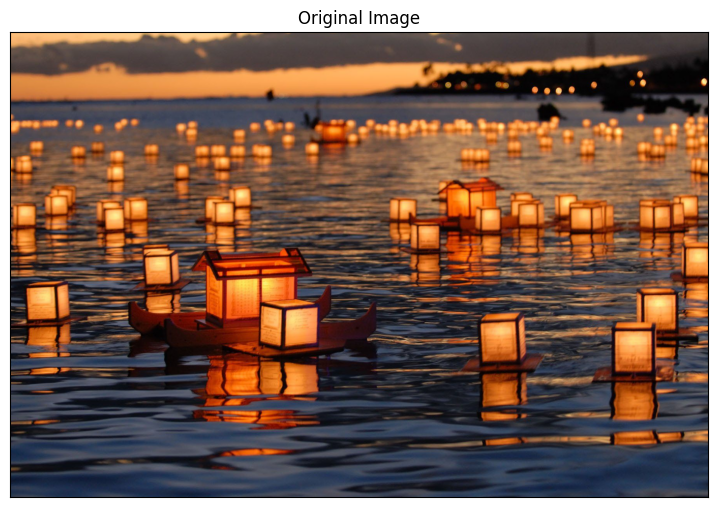

In [104]:
# Display the original and enhanced images
plt.figure(figsize=(9,10))
plt.plot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.show()

In [105]:
lsb_plane = np.uint8(img & 1)
lsb_size = lsb_plane.shape
lsb_size

(1200, 1800, 3)

In [106]:
lsb_plane = np.ravel(lsb_plane)
lsb_plane.shape

(6480000,)

In [107]:
# replace lsb bits of images by msg array
lsb_plane[:msg_size] = msg_arr

In [108]:
lsb_plane = np.reshape(lsb_plane, lsb_size)
lsb_plane.shape

(1200, 1800, 3)

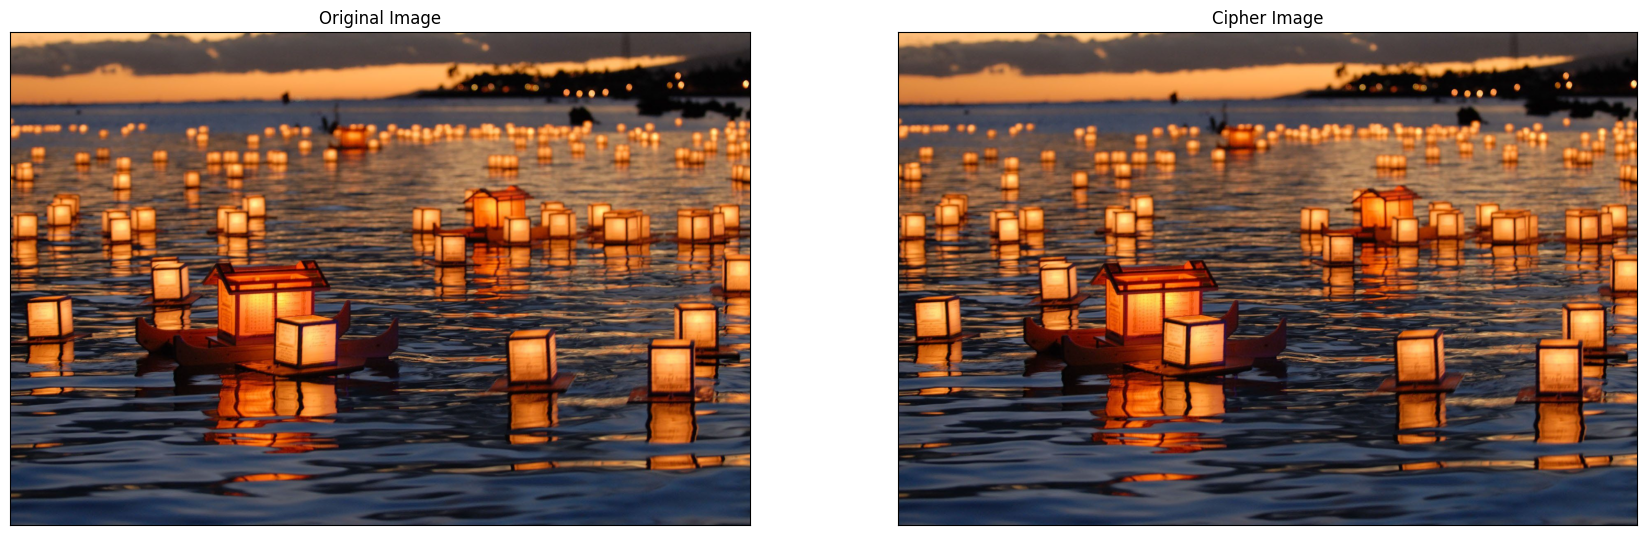

In [109]:
cipher_img = np.uint8((img & 254) | lsb_plane)

plt.figure(figsize=(21,10))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(cipher_img, cv2.COLOR_BGR2RGB)), plt.title('Cipher Image')
plt.xticks([]), plt.yticks([])
plt.show()

### Decoding Message from Image

In [110]:
cipher_img.shape

(1200, 1800, 3)

In [111]:
cph_lsb_plane = np.uint8(cipher_img & 1)
cph_lsb_plane = np.ravel(cph_lsb_plane)
cph_lsb_plane.shape

(6480000,)

In [112]:
bin_end_arr

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [113]:
idx = np.where(np.convolve(cph_lsb_plane, bin_end_arr[::-1], mode='valid') == np.sum(bin_end_arr))[0][0]
cph_lsb_plane = cph_lsb_plane[0:idx]
cph_lsb_plane.shape

(256,)

In [114]:
cph_bin_str = np.array2string(cph_lsb_plane, separator='')[1:-1].replace(' ', '')
cph_bin_str = cph_bin_str.replace('\n', '')
cph_bin_str.encode()

b'0100010110111010110100110001000110110000010111101010011001101010010100101100011111110101101010011001011010101000101110010011101011111001110000110001110101011110100111011011001110010100011100011001100001100000010111110011001111100010100011111000111110001110'

In [115]:
len(cph_bin_str)

256

In [116]:
cph_hex_str = hex(int(cph_bin_str, 2))[2:]
cph_hex_str

'45bad311b05ea66a52c7f5a996a8b93af9c31d5e9db3947198605f33e28f8f8e'

In [117]:
key_bytes = key.encode("utf-8").rjust(16)
iv = key_bytes

cipher = AES.new(key_bytes, AES.MODE_CBC, iv)

enc_msg = bytes.fromhex(cph_hex_str)
msg = unpad(cipher.decrypt(enc_msg), 16).decode("utf-8")
msg

'This is Secret Message'